In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
I = plt.imread('dog.jpg')

In [3]:
I.shape

(4000, 6000, 3)

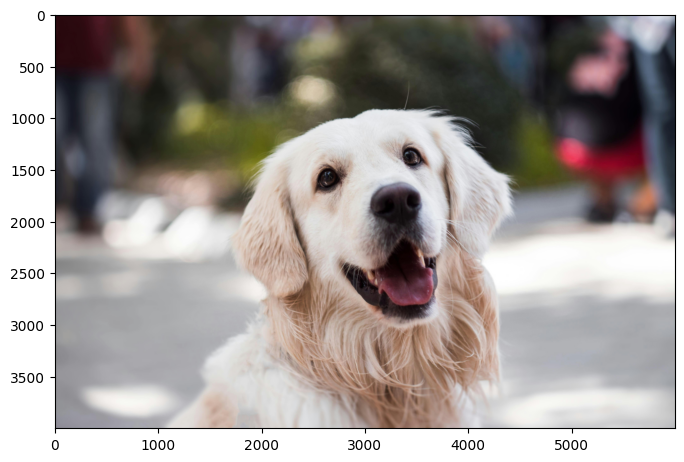

In [4]:
plt.figure(figsize=(8,6))
plt.imshow(I)

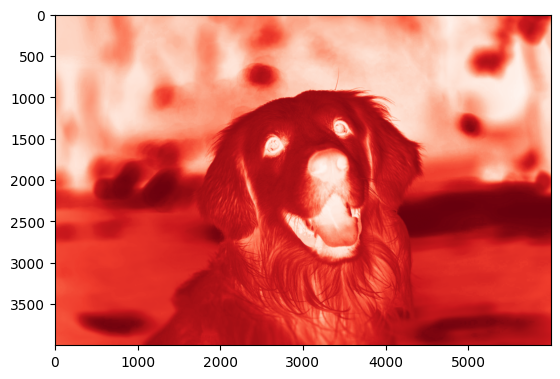

In [5]:
plt.imshow(I[:,:,0], cmap="Reds")

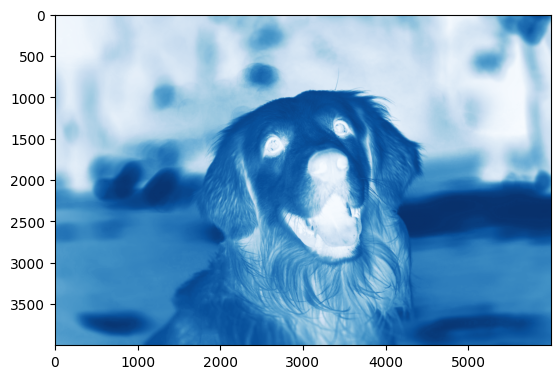

In [6]:
plt.imshow(I[:,:,1], cmap="Blues")

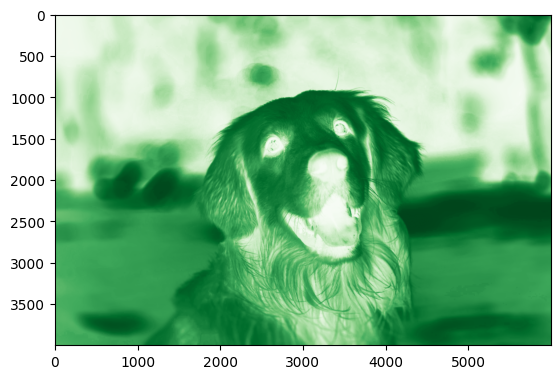

In [7]:
plt.imshow(I[:,:,2], cmap="Greens")

In [8]:
BW =I.mean( axis=2)

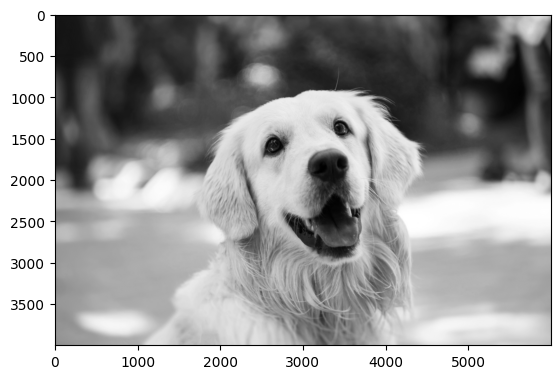

In [9]:
plt.imshow(BW, cmap='gray') 


In [10]:
## Discrete 2D Convolution 

In [11]:
paddedImage = np.pad(BW,[(10,20),(30,100)], 'constant')

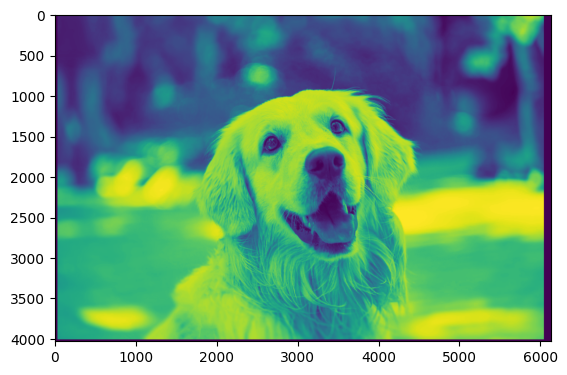

In [12]:
plt.imshow(paddedImage)

In [13]:
def discrete2DConvolution(Image, filter, padding):
  paddedImage= np.pad(Image, padding, 'constant')
  fltr = np.rot90(filter,2)
  conv=np.empty(Image.shape)
  #Striding and Multiplying
  for i in range(paddedImage.shape[0]-fltr.shape[0]):
    for j in range(paddedImage.shape[1]- fltr.shape[1]):
      conv[i,j] =np.sum((paddedImage[i:i+fltr.shape[0], j:j+fltr.shape[1]])*fltr)

  return conv

In [14]:
flterXX=np.array([[0,1,0],[0,1,0],[0,1,0]])
flterNeg=np.array([[-10,1,1],[-1,-1,-1],[-1,1,-1]])

flterREdge =np.array([[-10,0,10],[-10,0,10],[-10,0,10]])
flterLEdge =np.array([[10,0,-10],[10,0,-10],[10,0,-10]])

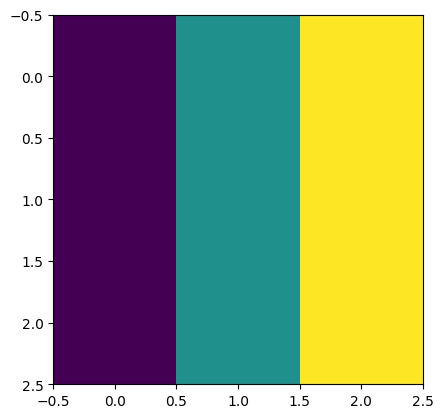

In [15]:
plt.imshow(flterREdge)

In [16]:
ImConv=discrete2DConvolution(BW, flterREdge, 1)

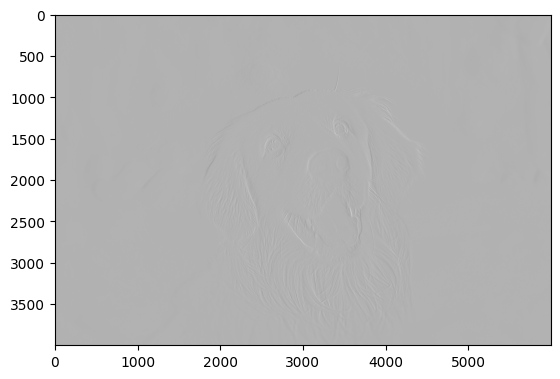

In [22]:
plt.imshow(ImConv, cmap='gray')
# plt.imshow(ImConv)

In [18]:
def MaxPool(Image, ksize, stride):
  n=0
  k=0

  vert = int(Image.shape[1]/stride)
  hoz = int(Image.shape[0]/stride)
  MxPool = np.empty((hoz,vert))

  for i in range(0, Image.shape[0]-stride, stride):
    n = 0
    for j in range(0,Image.shape[1]-stride, stride):
      MxPool[k,n] = np.max(Image[i:i+ksize,j:j+ksize])
      n+=1
    k+=1

  return MxPool

In [23]:
ImPool = MaxPool(ImConv, 2,2)

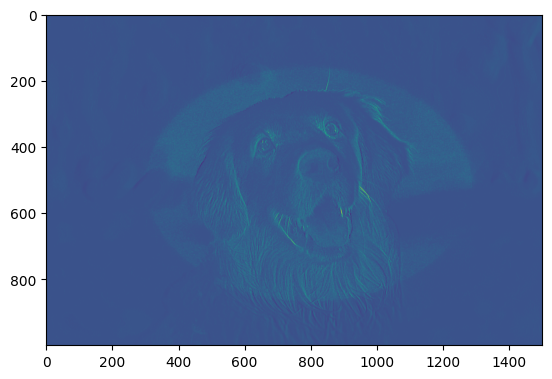

In [20]:
ImPool = MaxPool(ImPool, 2,2)
plt.imshow(ImPool)